Adult dataset
=======================================================

Imports & Warnings:

In [53]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# turn of warnings
import warnings
warnings.filterwarnings('ignore')

Defining headers of datasets

In [54]:
attributes_names= np.array(["Age","Workclass","fnlwgt","Education","Education-number","Marital-status","Occupation","Relationship","Ethnicity","Sex","Capital-gain","Capital-loss","Hours-per-week","Native-country","50k"])
attributes_categorical=np.array(['Workclass', 'Education', 'Marital-status', 'Occupation','Relationship','Ethnicity','Sex','Native-country','50k'])
attributes_continous=np.array(['Age','fnlwgt','Education-number','Capital-gain','Capital-loss','Hours-per-week'])

Loading train and test datasets:

In [55]:
adult_data_origin = pandas.read_csv('adult.csv', header=None, index_col= False, names=attributes_names);
adult_test_data_origin = pandas.read_csv('adult_test.csv', header=None, index_col= False, names=attributes_names);

# Remove first comment line
adult_test_data_origin=adult_test_data_origin.drop(adult_test_data_origin.index[0]);

## NAN Values

Missing values in both datasets are filled with " ?" and will be replaced with numpy.NAN:

In [56]:
adult_data_origin[attributes_names]= adult_data_origin[attributes_names].replace(' ?',np.NAN)
adult_test_data_origin[attributes_names]= adult_test_data_origin[attributes_names].replace(' ?',np.NAN)

### Quantity train dataset

In [57]:
display(adult_data_origin.isnull().sum())
# Count number of rows in a dataframe that contains NaN any column
seriesObj = adult_data_origin.apply(lambda x: x.isnull().any(), axis=1)
nanRows = len(seriesObj[seriesObj == True].index)
rows = adult_data_origin.shape[0]
print('Rows in total: ', rows)
print('Number of Rows in dataframe which contain NaN in any column : ', nanRows)
print('% nan :', (nanRows/rows)*100)

Age                    0
Workclass           1836
fnlwgt                 0
Education              0
Education-number       0
Marital-status         0
Occupation          1843
Relationship           0
Ethnicity              0
Sex                    0
Capital-gain           0
Capital-loss           0
Hours-per-week         0
Native-country       583
50k                    0
dtype: int64

Rows in total:  32561
Number of Rows in dataframe which contain NaN in any column :  2399
% nan : 7.367709836921471


### Quantity test dataset

In [58]:
display(adult_test_data_origin.isnull().sum())
# Count number of rows in a dataframe that contains NaN any column
seriesObj = adult_test_data_origin.apply(lambda x: x.isnull().any(), axis=1)
nanRows = len(seriesObj[seriesObj == True].index)
rows = adult_test_data_origin.shape[0]
print('Rows in total: ', rows)
print('Number of Rows in dataframe which contain NaN in any column : ', nanRows)
print('% nan :', (nanRows/rows)*100)

Age                   0
Workclass           963
fnlwgt                0
Education             0
Education-number      0
Marital-status        0
Occupation          966
Relationship          0
Ethnicity             0
Sex                   0
Capital-gain          0
Capital-loss          0
Hours-per-week        0
Native-country      274
50k                   0
dtype: int64

Rows in total:  16281
Number of Rows in dataframe which contain NaN in any column :  1221
% nan : 7.499539340335361


## Data types

Assigning data types

For traingint data:

In [59]:
for col in attributes_categorical:
   adult_data_origin[col]=adult_data_origin[col].astype('category')

For test data:

In [60]:
for col in attributes_categorical:
   adult_test_data_origin[col]=adult_data_origin[col].astype('category')

adult_test_data_origin['Age']=adult_data_origin['Age'].astype('int64')

## Train Dataset Description

                Age        fnlwgt  Education-number  Capital-gain  \
count  32561.000000  3.256100e+04      32561.000000  32561.000000   
mean      38.581647  1.897784e+05         10.080679   1077.648844   
std       13.640433  1.055500e+05          2.572720   7385.292085   
min       17.000000  1.228500e+04          1.000000      0.000000   
25%       28.000000  1.178270e+05          9.000000      0.000000   
50%       37.000000  1.783560e+05         10.000000      0.000000   
75%       48.000000  2.370510e+05         12.000000      0.000000   
max       90.000000  1.484705e+06         16.000000  99999.000000   

       Capital-loss  Hours-per-week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


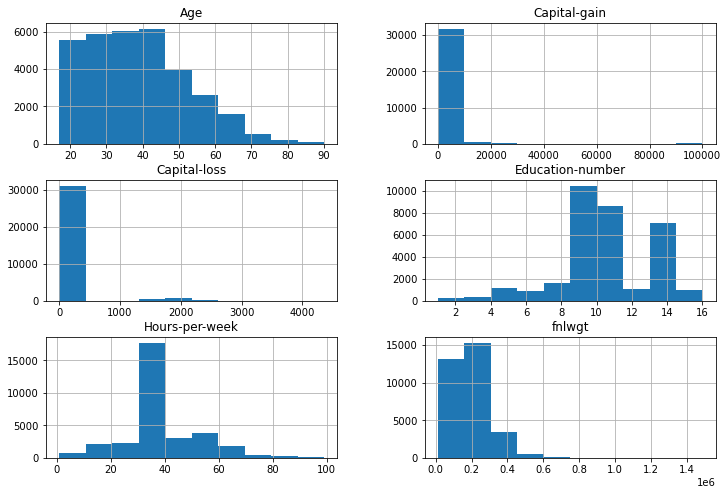

In [61]:
print(adult_data_origin.describe());
fig = adult_data_origin.hist(column=attributes_continous, figsize=(12,8))

## Test Dataset Description

                Age        fnlwgt  Education-number  Capital-gain  \
count  16281.000000  1.628100e+04      16281.000000  16281.000000   
mean      38.547939  1.894357e+05         10.072907   1081.905104   
std       13.652768  1.057149e+05          2.567545   7583.935968   
min       17.000000  1.349200e+04          1.000000      0.000000   
25%       28.000000  1.167360e+05          9.000000      0.000000   
50%       37.000000  1.778310e+05         10.000000      0.000000   
75%       47.000000  2.383840e+05         12.000000      0.000000   
max       90.000000  1.490400e+06         16.000000  99999.000000   

       Capital-loss  Hours-per-week  
count  16281.000000    16281.000000  
mean      87.899269       40.392236  
std      403.105286       12.479332  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     3770.000000       99.000000  


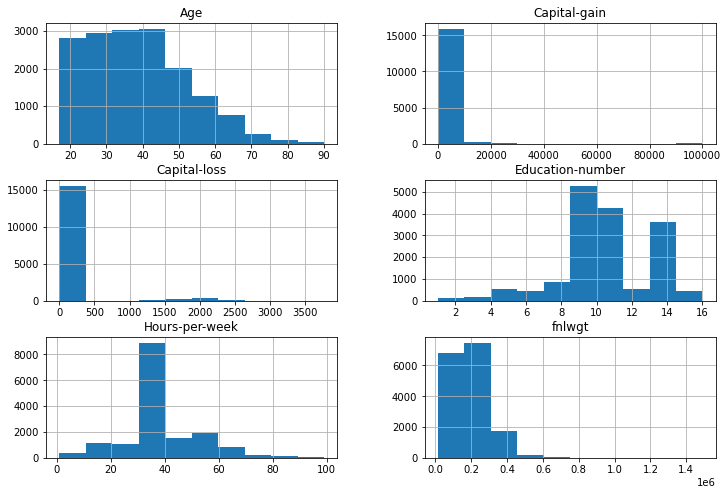

In [62]:
print(adult_test_data_origin.describe());
fig = adult_test_data_origin.hist(column=attributes_continous, figsize=(12,8))


## Remove Nan Values 

In [63]:
adult_data = adult_data_origin.dropna()
adult_test_data = adult_test_data_origin.dropna()

### Training dataset without nan

                Age        fnlwgt  Education-number  Capital-gain  \
count  32561.000000  3.256100e+04      32561.000000  32561.000000   
mean      38.581647  1.897784e+05         10.080679   1077.648844   
std       13.640433  1.055500e+05          2.572720   7385.292085   
min       17.000000  1.228500e+04          1.000000      0.000000   
25%       28.000000  1.178270e+05          9.000000      0.000000   
50%       37.000000  1.783560e+05         10.000000      0.000000   
75%       48.000000  2.370510e+05         12.000000      0.000000   
max       90.000000  1.484705e+06         16.000000  99999.000000   

       Capital-loss  Hours-per-week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


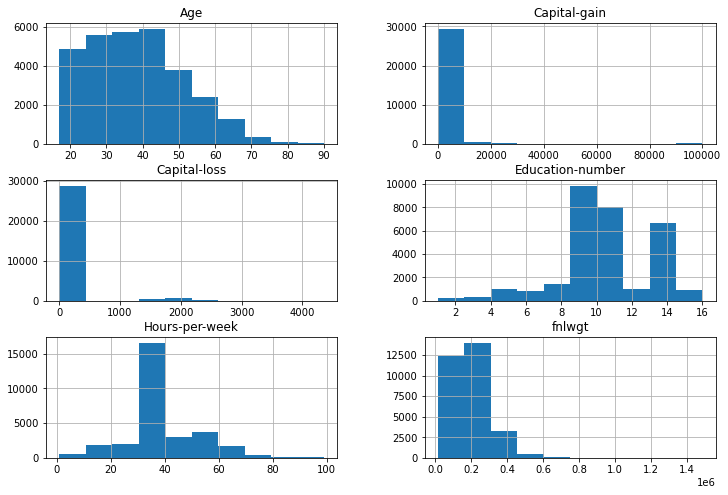

In [64]:
print(adult_data_origin.describe());
fig = adult_data.hist(column=attributes_continous, figsize=(12,8))

Frequency distribution of categorical attributes:

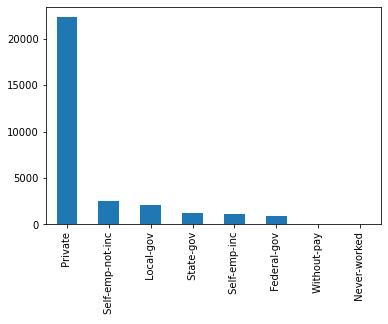

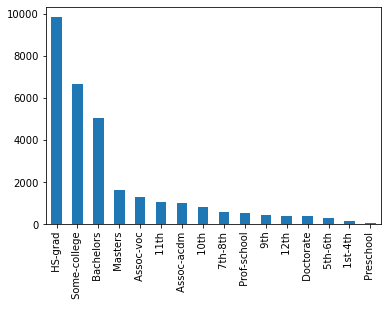

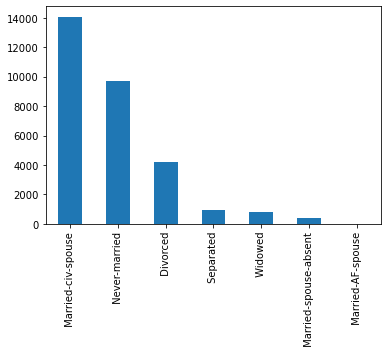

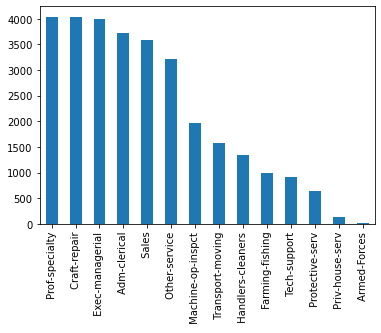

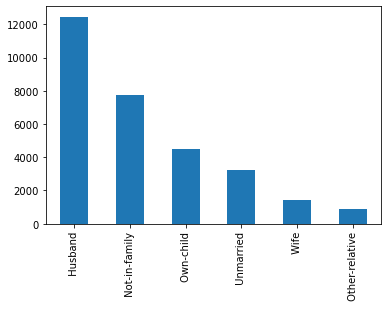

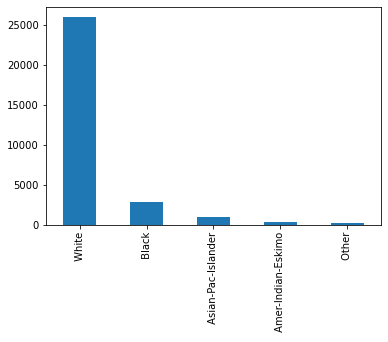

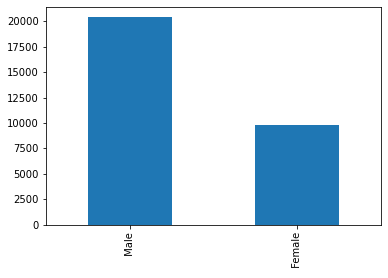

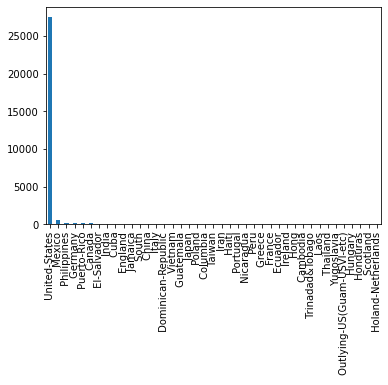

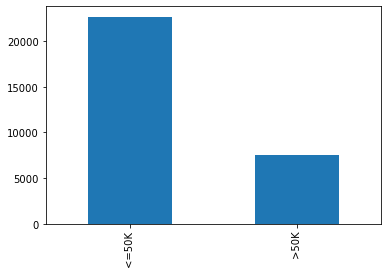

In [65]:
for cat in attributes_categorical:
    fig, ax = plt.subplots()
    adult_data[cat].value_counts().plot(ax=ax, kind='bar')

### Test dataset without nan

                Age        fnlwgt  Education-number  Capital-gain  \
count  32561.000000  3.256100e+04      32561.000000  32561.000000   
mean      38.581647  1.897784e+05         10.080679   1077.648844   
std       13.640433  1.055500e+05          2.572720   7385.292085   
min       17.000000  1.228500e+04          1.000000      0.000000   
25%       28.000000  1.178270e+05          9.000000      0.000000   
50%       37.000000  1.783560e+05         10.000000      0.000000   
75%       48.000000  2.370510e+05         12.000000      0.000000   
max       90.000000  1.484705e+06         16.000000  99999.000000   

       Capital-loss  Hours-per-week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


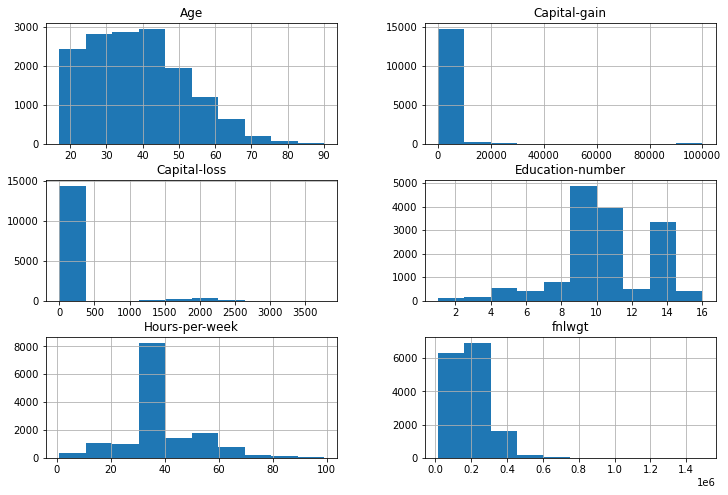

In [66]:
print(adult_data_origin.describe());
fig = adult_test_data.hist(column=attributes_continous, figsize=(12,8))

Frequency distribution of categorical attributes:

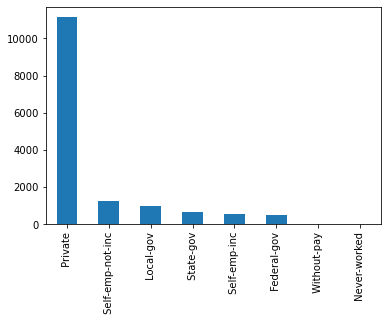

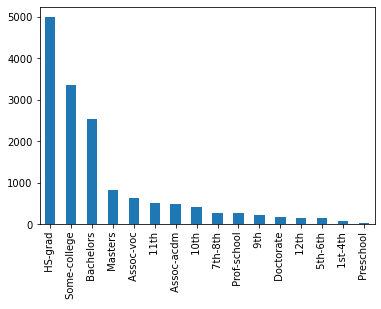

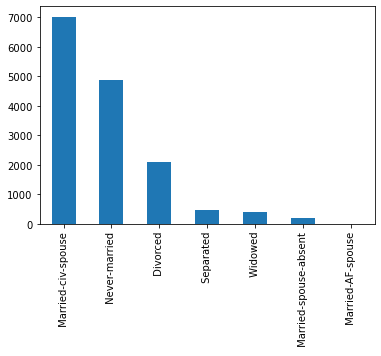

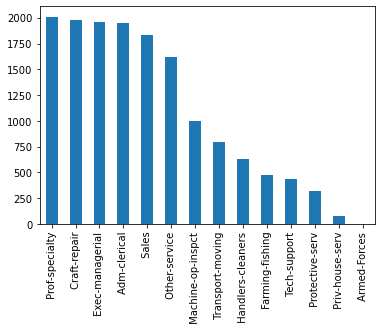

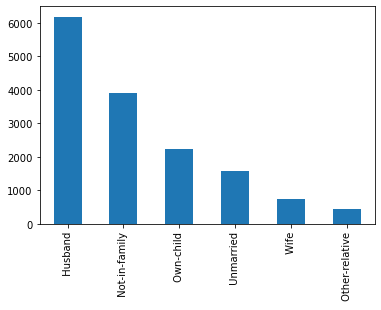

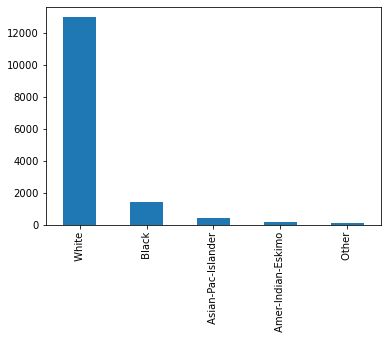

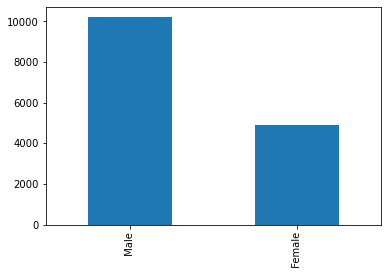

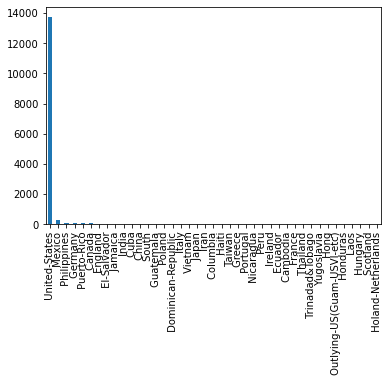

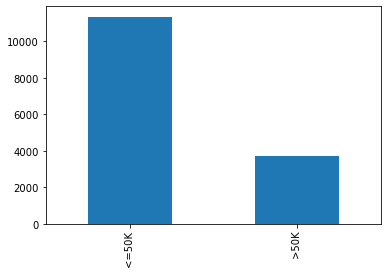

In [67]:
for cat in attributes_categorical:
    fig, ax = plt.subplots()
    adult_test_data[cat].value_counts().plot(ax=ax, kind='bar')

In [68]:

adult_data['Education-number']=adult_data_origin['Education-number'].astype('float64')
adult_data['Capital-gain']=adult_data_origin['Capital-gain'].astype('float64')
adult_data['Capital-loss']=adult_data_origin['Capital-loss'].astype('float64')
adult_data['Capital-loss']=adult_data_origin['Capital-loss'].astype('float64')
adult_data['Hours-per-week']=adult_data_origin['Capital-loss'].astype('float64')
print(adult_test_data.dtypes)
print(adult_data.dtypes)

adult_data.to_csv("Cleaned/adult_data.csv", encoding='utf-8',header=True)

Age                    int64
Workclass           category
fnlwgt               float64
Education           category
Education-number     float64
Marital-status      category
Occupation          category
Relationship        category
Ethnicity           category
Sex                 category
Capital-gain         float64
Capital-loss         float64
Hours-per-week       float64
Native-country      category
50k                 category
dtype: object
Age                    int64
Workclass           category
fnlwgt                 int64
Education           category
Education-number     float64
Marital-status      category
Occupation          category
Relationship        category
Ethnicity           category
Sex                 category
Capital-gain         float64
Capital-loss         float64
Hours-per-week       float64
Native-country      category
50k                 category
dtype: object
